In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from lazypredict.Supervised import LazyRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
housingData = pd.read_csv('housingData.csv')
housingData = pd.DataFrame(housingData)

# Base Model

In [3]:
numerical_variables = ['Bed Room', 'Extra Space', 'Wash Room', 'Kitchen', 'List Price', 'Sold Price']
numericalHousingData = housingData[numerical_variables]

features_to_drop = ['Sold Price']

X = numericalHousingData.drop(features_to_drop, axis=1)
y = numericalHousingData['Sold Price'].astype(float)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nPerformance Matrix:\n")
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

# Feature Importance
feature_importance = random_forest_model.feature_importances_

# Print Feature Importance
print("\nFeature Importance:")
for feature_name, importance in zip(X.columns, feature_importance):
    print(f"{feature_name}: {importance}")



Performance Matrix:

Mean Squared Error: 14645890721.454618
R-squared: 0.7832309572984265
Mean Absolute Error: 91879.28328314662
Root Mean Squared Error: 121020.20790535198

Feature Importance:
Bed Room: 0.022652743065015805
Extra Space: 0.0349539818293592
Wash Room: 0.03288987714582328
Kitchen: 0.003940303858823924
List Price: 0.9055630941009778


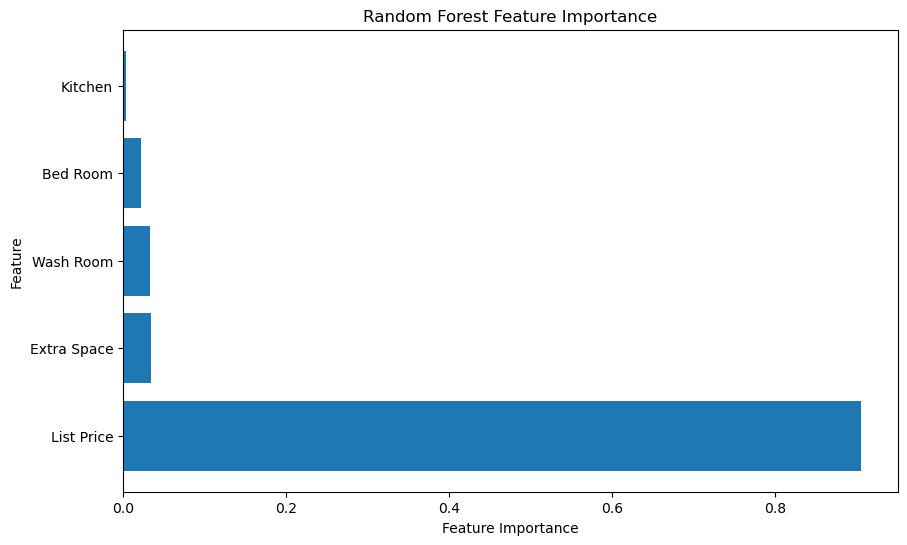

In [4]:
# Feature names
feature_names = X.columns

# Sort feature importance scores and feature names in descending order
sorted_indices = feature_importance.argsort()[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_feature_importance)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()


# Correlation Matrix

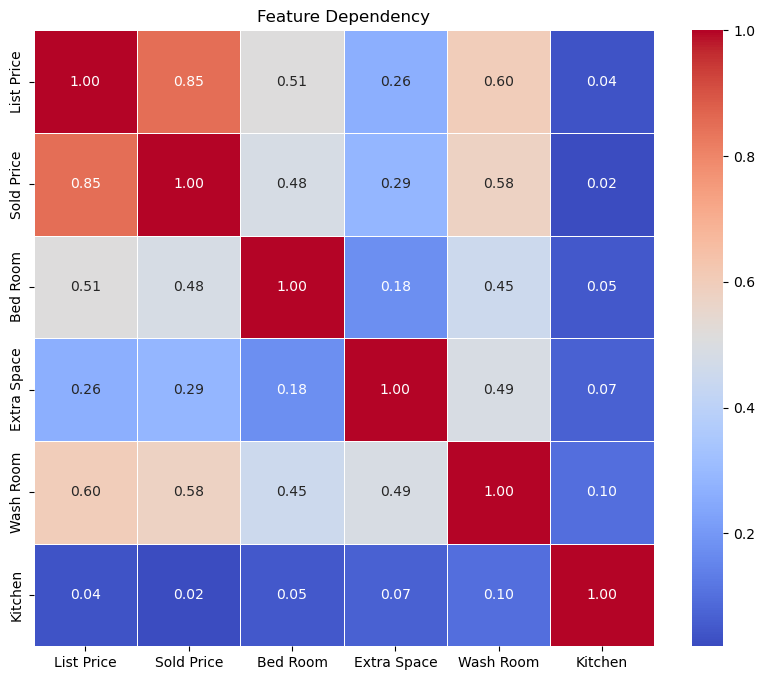

In [5]:
numerical_columns = ['List Price', 'Sold Price', 'Bed Room', 'Extra Space', 'Wash Room', 'Kitchen']

correlation_matrix = housingData[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Dependency')
plt.show()

# Data Encoding

In [6]:
# ONE-HOT ENCODING
# Check the unique values in the "Family Room" column
unique_family_room = housingData['Family Room'].unique()
# Apply one-hot encoding to the "Family Room" column
one_hot_encoded_family_room = pd.get_dummies(housingData['Family Room'], prefix='Family_Room')
# Concatenate the one-hot encoded styles with the original DataFrame
housingDataEncoded = pd.concat([housingData, one_hot_encoded_family_room], axis=1)

# LABLE ENCODING 
# Encode community column with its respected population count.
label_map_community = {"Heart Lake": 1256,"Bramalea N": 2766,"Toronto Go": 3497, "Northwest": 5013,"Gore Industrial": 5202,"Avondale": 7538,"Fletcher's Creek": 9104,"Northwood": 10819,"Snelgrove": 10872,"Downtown Brampton": 10874,"Brampton E": 10884,"Southgate": 12950,"Westgate": 13702,"Brampton S": 13726,"Central Park": 14527,"Brampton W": 14691,"Vales of Caclemore": 14823,"Northgate": 15499,"Brampton N": 16721,"Queen Street": 21339,"Madoc": 22537,"Credit Valley": 32590,"Sandringham": 75599}
housingDataEncoded['Community Encoded'] = housingDataEncoded['Community'].map(label_map_community)


# FREQUENCY ENCODING
# Calculate the frequency of each category in the "Garage Typ" column
Garage_Type_frequency = housingDataEncoded['Garage Type'].value_counts(normalize=False)

# Map the frequencies to the original categories and create a new column
housingDataEncoded['Garage_Type_Frequency_Encoded'] = housingDataEncoded['Garage Type'].map(Garage_Type_frequency)

# Calculate the frequency of each category in the "Style" column
style_frequency = housingDataEncoded['Style'].value_counts(normalize=False)
# Map the frequencies to the original categories and create a new column
housingDataEncoded['Style_Frequency_Encoded'] = housingDataEncoded['Style'].map(style_frequency)


# FEATURE ENGINEERING
# Calculate Ratio of Bedrooms to Washrooms
housingDataEncoded['Bedrooms_to_Washrooms_Ratio'] = housingDataEncoded['Bed Room'] / housingDataEncoded['Wash Room']

# Create total space feature by summed up all spaces counts
housingDataEncoded['Total_Spaces'] = housingDataEncoded['Bed Room'] + housingDataEncoded['Extra Space'] + housingDataEncoded['Kitchen'] + housingDataEncoded['Wash Room'] 


# Drop columns
housingDataEncoded.drop('Style', axis=1, inplace=True)
housingDataEncoded.drop('Community', axis=1, inplace=True)
housingDataEncoded.drop('Family Room', axis=1, inplace=True)
housingDataEncoded.drop('Garage Type', axis=1, inplace=True)
housingDataEncoded.drop('Type', axis=1, inplace=True)
housingDataEncoded.drop('Listing Class', axis=1, inplace=True)
housingDataEncoded.drop('Listing ID', axis=1, inplace=True)
housingDataEncoded.drop('Street Number', axis=1, inplace=True)
housingDataEncoded.drop('Street Name', axis=1, inplace=True)
housingDataEncoded.drop('A/C', axis=1, inplace=True)
housingDataEncoded.drop('Heat Type', axis=1, inplace=True)
housingDataEncoded.drop('List Brokerage', axis=1, inplace=True)
housingDataEncoded.drop('Sold Date', axis=1, inplace=True)
housingDataEncoded.drop('Contract Date', axis=1, inplace=True)
housingDataEncoded.drop('Municipality', axis=1, inplace=True)
housingDataEncoded.drop('#', axis=1, inplace=True)


housingDataEncoded.describe().T

,count,mean,std,min,25%,50%,75%,max
List Price,1435.00,1288314.32,272081.60,699900.00,1099000.00,1285000.00,1399999.00,2999900.00
Sold Price,1435.00,1354142.68,257486.03,710000.00,1177843.00,1332000.00,1500000.00,2625000.00
Bed Room,1435.00,3.72,0.61,0.00,3.00,4.00,4.00,6.00
Extra Space,1435.00,1.10,0.93,0.00,0.00,1.00,2.00,5.00
Wash Room,1435.00,3.82,0.92,1.00,3.00,4.00,4.00,8.00
Kitchen,1435.00,1.02,0.15,0.00,1.00,1.00,1.00,2.00
Family_Room_N,1435.00,0.17,0.38,0.00,0.00,0.00,0.00,1.00
Family_Room_Y,1435.00,0.83,0.38,0.00,1.00,1.00,1.00,1.00
Community Encoded,1435.00,20423.11,23280.92,1256.00,9104.00,10872.00,15499.00,75599.00
Garage_Type_Frequency_Encoded,1435.00,770.77,188.17,522.00,522.00,913.00,913.00,913.00


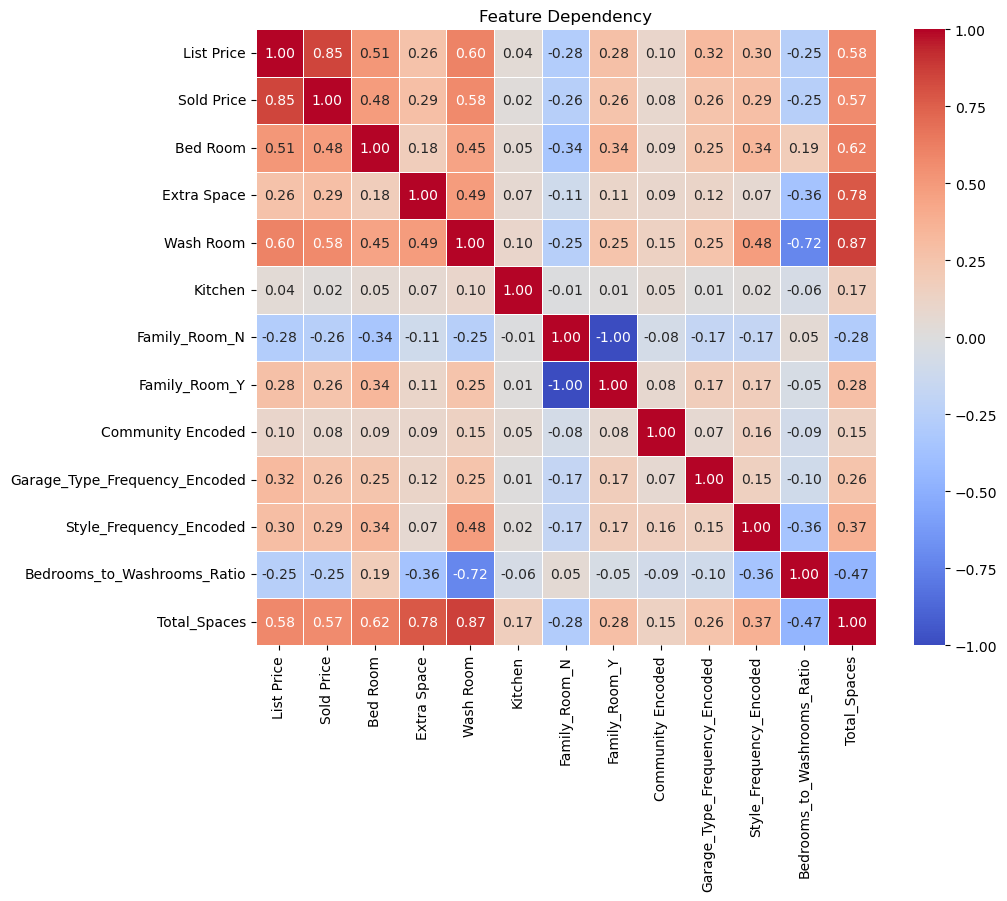

In [9]:
correlation_matrix1 = housingDataEncoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Dependency')
plt.show()

In [10]:
housingDataEncoded.describe().T

,count,mean,std,min,25%,50%,75%,max
List Price,1435.00,1288314.32,272081.60,699900.00,1099000.00,1285000.00,1399999.00,2999900.00
Sold Price,1435.00,1354142.68,257486.03,710000.00,1177843.00,1332000.00,1500000.00,2625000.00
Bed Room,1435.00,3.72,0.61,0.00,3.00,4.00,4.00,6.00
Extra Space,1435.00,1.10,0.93,0.00,0.00,1.00,2.00,5.00
Wash Room,1435.00,3.82,0.92,1.00,3.00,4.00,4.00,8.00
Kitchen,1435.00,1.02,0.15,0.00,1.00,1.00,1.00,2.00
Family_Room_N,1435.00,0.17,0.38,0.00,0.00,0.00,0.00,1.00
Family_Room_Y,1435.00,0.83,0.38,0.00,1.00,1.00,1.00,1.00
Community Encoded,1435.00,20423.11,23280.92,1256.00,9104.00,10872.00,15499.00,75599.00
Garage_Type_Frequency_Encoded,1435.00,770.77,188.17,522.00,522.00,913.00,913.00,913.00


In [11]:
# Creating new csv file with the cleaned dataset tobe used in Tableau for the visulization
output_csv_path = 'housingDataEncoded.csv'
housingDataEncoded.to_csv(output_csv_path, index=False)

# Feature Importance & Performance Matrix After Data Encoding

In [12]:
numericalHousingData = housingDataEncoded.copy()

features_to_drop = ['Sold Price']

X = numericalHousingData.drop(features_to_drop, axis=1)
y = numericalHousingData['Sold Price'].astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

# Feature Importance
feature_importance_encoded = random_forest_model.feature_importances_

# Print Feature Importance
print("\nFeature Importance:")
for feature_name, importance in zip(X.columns, feature_importance_encoded):
    print(f"{feature_name}: {importance}")


Mean Squared Error: 14550728740.145405
R-squared: 0.7846394186875154
Mean Absolute Error: 92518.07461116643
Root Mean Squared Error: 120626.40150541425

Feature Importance:
List Price: 0.833581939008238
Bed Room: 0.008260097016406126
Extra Space: 0.01734252845624861
Wash Room: 0.008499563361114888
Kitchen: 0.002001863107371221
Family_Room_N: 0.005733182798542306
Family_Room_Y: 0.004653446589157054
Community Encoded: 0.05409277354566202
Garage_Type_Frequency_Encoded: 0.013704579218414443
Style_Frequency_Encoded: 0.00981786491238818
Bedrooms_to_Washrooms_Ratio: 0.016503387739385415
Total_Spaces: 0.025808774247071585


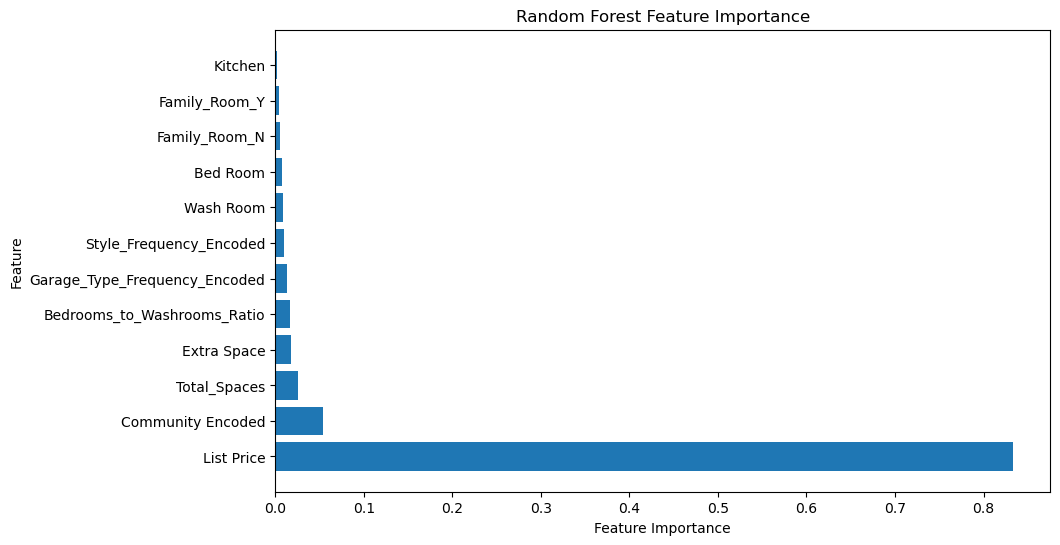

In [13]:
# Feature names
feature_names = X.columns

# Sort feature importance scores and feature names in descending order
sorted_indices = feature_importance_encoded.argsort()[::-1]
sorted_feature_importance = feature_importance_encoded[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_feature_importance)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()


# Sample Models After Data Encoding

### Try to find best models with the help of lazypredict.

In [14]:

df = housingDataEncoded

df = df[pd.to_numeric(df['Sold Price'], errors='coerce').notnull()]

X = df.drop('Sold Price', axis=1)
y = df['Sold Price'].astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg = LazyRegressor(ignore_warnings=True, random_state=42)

models, predictions = reg.fit(X_train_scaled, X_test_scaled, y_train, y_test)

print(models)


100%|██████████| 42/42 [00:38<00:00,  1.09it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 1148, number of used features: 12
[LightGBM] [Info] Start training from score 1353933.275261
                               Adjusted R-Squared  R-Squared        RMSE  \
Model                                                                      
LGBMRegressor                                0.78       0.79   119565.21   
GradientBoostingRegressor                    0.78       0.79   119697.54   
RandomForestRegressor                        0.78       0.78   120667.43   
HistGradientBoostingRegressor                0.77       0.78   121746.20   
XGBRegressor                                 0.76       0.77   124306.52   
BaggingRegressor                             0.76       0.

## 1. Gradient Boosting Regressor:

In [15]:
df = housingDataEncoded

features_to_drop = ['Sold Price']

X = df.drop(features_to_drop, axis=1)
y = df['Sold Price'].astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gradient_boosting_model.fit(X_train, y_train)

y_pred = gradient_boosting_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 14327500782.618961
R-squared: 0.7879433427422231


## 2. LGBM Regressor:

In [16]:
df = housingDataEncoded

features_to_drop = ['Sold Price']

X = df.drop(features_to_drop, axis=1)
y = df['Sold Price'].astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)

y_pred = lgbm_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 332
[LightGBM] [Info] Number of data points in the train set: 1148, number of used features: 12
[LightGBM] [Info] Start training from score 1353933.275261
Mean Squared Error: 14195330696.095222
R-squared: 0.7898995490033804


## 3. Random Forest Regressor:

In [17]:
df = housingDataEncoded

features_to_drop = ['Sold Price']
# features_to_drop = ['Sold Price', 'List Price']

X = df.drop(features_to_drop, axis=1)
y = df['Sold Price'].astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 14550728740.145405
R-squared: 0.7846394186875154


## 4. XGB Regressor:

In [18]:
df = housingDataEncoded

features_to_drop = ['Sold Price']

X = df.drop(features_to_drop, axis=1)
y = df['Sold Price'].astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 15452109676.437977
R-squared: 0.7712983739954803


# Scaling Data

In [19]:
housingDataEncoded.describe().T

,count,mean,std,min,25%,50%,75%,max
List Price,1435.00,1288314.32,272081.60,699900.00,1099000.00,1285000.00,1399999.00,2999900.00
Sold Price,1435.00,1354142.68,257486.03,710000.00,1177843.00,1332000.00,1500000.00,2625000.00
Bed Room,1435.00,3.72,0.61,0.00,3.00,4.00,4.00,6.00
Extra Space,1435.00,1.10,0.93,0.00,0.00,1.00,2.00,5.00
Wash Room,1435.00,3.82,0.92,1.00,3.00,4.00,4.00,8.00
Kitchen,1435.00,1.02,0.15,0.00,1.00,1.00,1.00,2.00
Family_Room_N,1435.00,0.17,0.38,0.00,0.00,0.00,0.00,1.00
Family_Room_Y,1435.00,0.83,0.38,0.00,1.00,1.00,1.00,1.00
Community Encoded,1435.00,20423.11,23280.92,1256.00,9104.00,10872.00,15499.00,75599.00
Garage_Type_Frequency_Encoded,1435.00,770.77,188.17,522.00,522.00,913.00,913.00,913.00


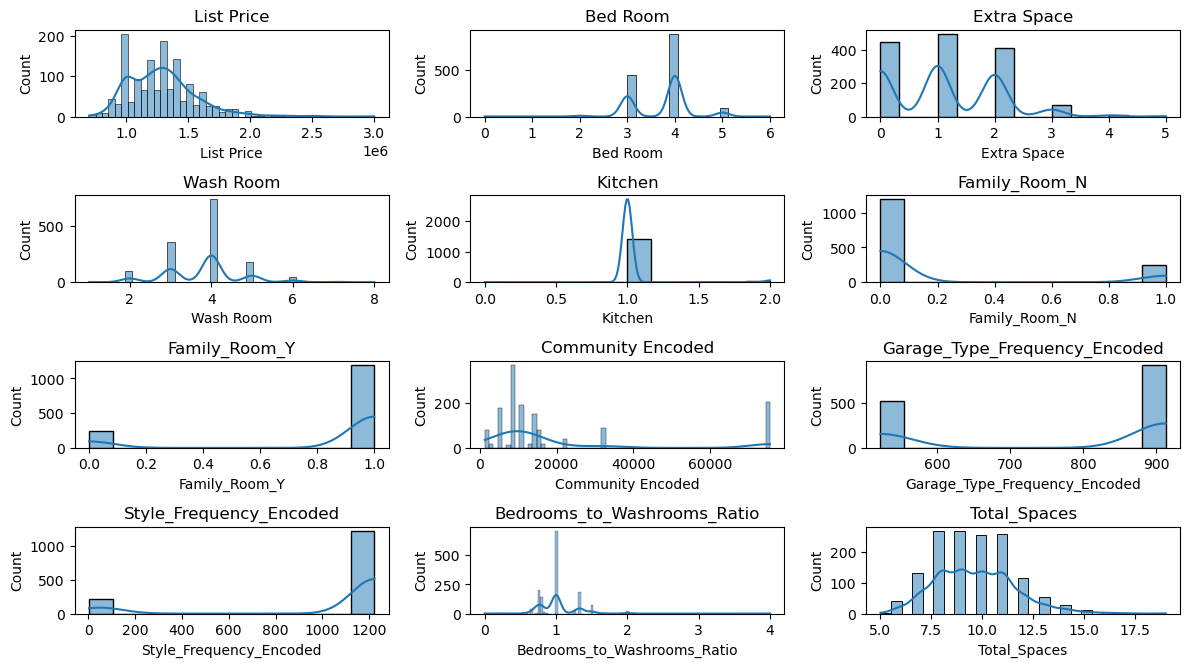

In [20]:
# Plot histograms for numeric variables
numeric_variables = [column for column in housingDataEncoded.columns if column != 'Sold Price']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_variables, 1):
    plt.subplot(5, 3, i)
    sns.histplot(housingDataEncoded[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [21]:
# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

variables_to_scale = [column for column in housingDataEncoded.columns if column != 'Sold Price']

variables_to_scale

['List Price',
 'Bed Room',
 'Extra Space',
 'Wash Room',
 'Kitchen',
 'Family_Room_N',
 'Family_Room_Y',
 'Community Encoded',
 'Garage_Type_Frequency_Encoded',
 'Style_Frequency_Encoded',
 'Bedrooms_to_Washrooms_Ratio',
 'Total_Spaces']

# Min-Max Scaling

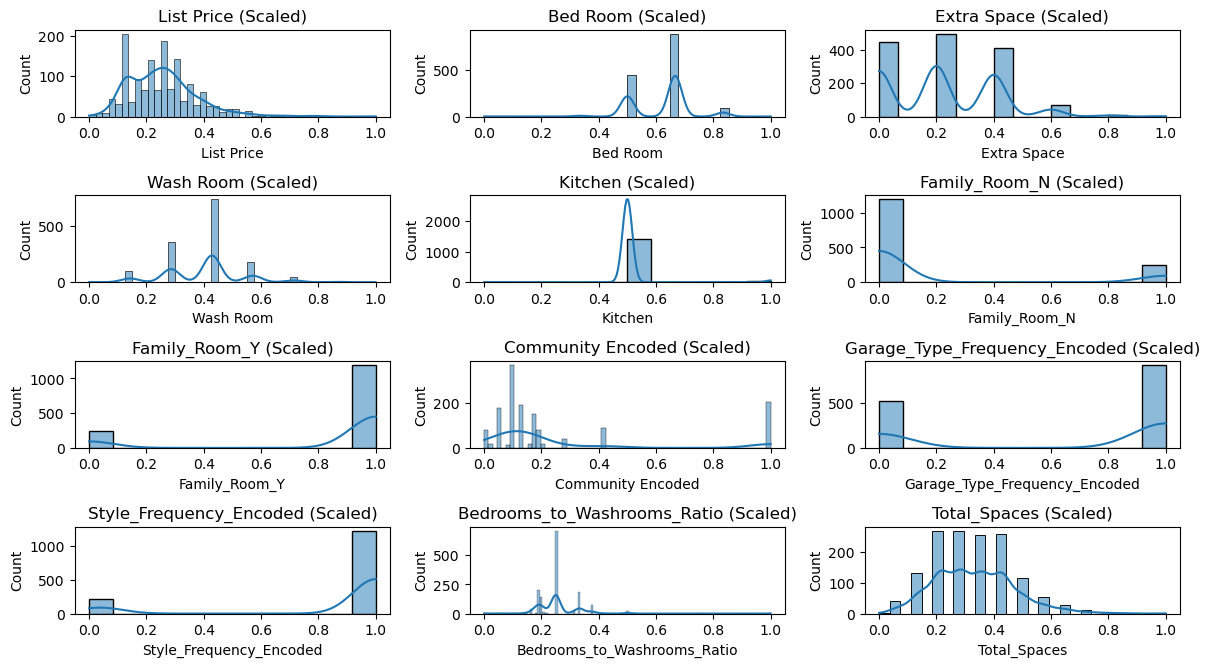

In [22]:
# Min-Max Scaling
housingDataMinMaxScaled = housingDataEncoded.copy()
housingDataMinMaxScaled[variables_to_scale] = minmax_scaler.fit_transform(housingDataMinMaxScaled[variables_to_scale])

# Plot histograms for scaled numeric variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(variables_to_scale, 1):
    plt.subplot(5, 3, i)
    sns.histplot(housingDataMinMaxScaled[col], kde=True)
    plt.title(col + ' (Scaled)')
plt.tight_layout()
plt.show()

In [23]:
# Creating new csv file with the cleaned dataset tobe used in Tableau for the visulization
output_csv_path = 'housingDataScaled.csv'
housingDataMinMaxScaled.to_csv(output_csv_path, index=False)

# Model after Min-Max Scalling

- we have choosed LGBM model to predict sold price.

## 2. LGBM Regressor:

In [36]:
features_to_drop = ['Sold Price']

X1 = housingDataMinMaxScaled.drop(features_to_drop, axis=1)
y1 = housingDataMinMaxScaled['Sold Price'].astype(float)


X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.17, random_state=42)

lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X1_train, y1_train)

y1_pred = lgbm_model.predict(X1_test)


r21 = r2_score(y1_test, y1_pred)
mape1 = mean_absolute_percentage_error(y1_test, y1_pred)

print(f'R-squared: {r21}')
print(f'Mean Absolute Percentage Error: {mape1}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 1191, number of used features: 12
[LightGBM] [Info] Start training from score 1354222.009236
R-squared: 0.8029692105410416
Mean Absolute Percentage Error: 0.06964104000284863


In [25]:
# New data for prediction (assuming it's stored in a DataFrame called 'new_data')
new_data = pd.DataFrame({
    'List Price': [0.28],
    'Bed Room': [0.67],
    'Extra Space': [0.60],
    'Wash Room': [0.57],
    'Kitchen': [0.50],
    'Family_Room_N': [0.00],
    'Family_Room_Y': [1.00],
    'Community Encoded': [0.42],
    'Garage_Type_Frequency_Encoded': [1.00],
    'Style_Frequency_Encoded': [1.00],
    'Bedrooms_to_Washrooms_Ratio': [0.20],
    'Total_Spaces': [0.57]
})

# Use the trained model to make predictions
predictions = lgbm_model.predict(new_data)

# Print the predictions
print(predictions)


[1384918.70103591]


In [26]:
new_data.shape

(1, 12)

In [27]:
predictions.shape

(1,)

In [28]:
# Use the trained model to make predictions
predictions = lgbm_model.predict([[-3.04303043e-01, 1.66666667e-01, 4.00000000e-01, 0.00000000e+00, 2.50650000e+03, 5.22000000e+02, 1.22200000e+03, 1.74696205e+01, -1.33503836e+00, -1.64068909e-03, 3.75000000e-01, 1.42857143e-01]])

# Print the predictions
print(predictions)

[861632.01329134]


In [29]:
import joblib

# Save MinMaxScaler object
joblib.dump(minmax_scaler, 'minmax_scaler.pkl')

# Save LGBM model
joblib.dump(lgbm_model, 'lgbm_model.pkl')


['lgbm_model.pkl']

In [30]:
# Creating pkl files for model and scaler
minmax_scaler_dump = joblib.load('minmax_scaler.pkl')
lgbm_model_dump = joblib.load('lgbm_model.pkl')

In [31]:
# New data for prediction (assuming it's stored in a DataFrame called 'new_data')
unscaled_data = pd.DataFrame({
    'List Price': [1300000],
    'Bed Room': [3],
    'Extra Space': [1],
    'Wash Room': [2],
    'Kitchen': [1],
    'Family_Room_N': [0],
    'Family_Room_Y': [1],
    'Community Encoded': [5013],
    'Garage_Type_Frequency_Encoded': [522],
    'Style_Frequency_Encoded': [1222],
    'Bedrooms_to_Washrooms_Ratio': [1.5],
    'Total_Spaces': [7]
})

unscaled_data

,List Price,Bed Room,Extra Space,Wash Room,Kitchen,Family_Room_N,Family_Room_Y,Community Encoded,Garage_Type_Frequency_Encoded,Style_Frequency_Encoded,Bedrooms_to_Washrooms_Ratio,Total_Spaces
0,1300000,3,1,2,1,0,1,5013,522,1222,1.50,7


In [32]:
scaled_user_input = minmax_scaler.transform(unscaled_data)
scaled_user_input

array([[0.26091304, 0.5       , 0.2       , 0.14285714, 0.5       ,
        0.        , 1.        , 0.05053603, 0.        , 1.        ,
        0.375     , 0.14285714]])

In [33]:

scaled_user_input_dump = minmax_scaler_dump.transform(unscaled_data)
scaled_user_input_dump

array([[0.26091304, 0.5       , 0.2       , 0.14285714, 0.5       ,
        0.        , 1.        , 0.05053603, 0.        , 1.        ,
        0.375     , 0.14285714]])

In [34]:
scaled_user_input_dump.shape

(1, 12)

In [35]:
# Use the trained model to make predictions
predictions = lgbm_model_dump.predict(new_data)

# Print the predictions
print(predictions)

[1384918.70103591]
